<a href="https://colab.research.google.com/github/Papidu/Math_model/blob/main/dip_map.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

В архиве лежат три файла:
PATIENTS - пациенты
PATDIREC - направления, оформленные на приемах
EXAM -  справочник направлений

```
# This is formatted as code
patients_columns = ['patients_id','pol', 'birth_year', 'site_registration',
                    'site_registration_date','city_id','city_name',
                    'city_socr','serv_cnt','tran_sum']
patdirec_columns = ['motconsu_id','date_consultation','medecins_id',
                    'patients_id','models_id','models_name',
                    'pl_exam_id','bill_date']
exam_columns = ['pl_exam_id','name','fm_serv_id','group_id','group_name','price']
```



# Описание полей EXAM:

EXAM
pl_exam_id - идентификатор направления (на что направлен пациент)


name - название направления

fm_serv_id - идентификатор услуги из направления

group_id - идентификатор группы направления

group_name - название группы направления

price - актуальная на текущий момент цена

In [ ]:
data_EXAM = pd.read_csv('/content/drive/MyDrive/dip_f/PL_EXAM.csv', sep=';', 
                   error_bad_lines=False,
                   header=None,
                   warn_bad_lines=False)#error_bad_lines=False),
data_EXAM.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5
0,1166,Прием пластического хирурга первичный,NaN,2,Консультации специалистов,0.00
1,1167,Прием пластического хирурга повторный,NaN,2,Консультации специалистов,0.00
2,1168,Прием пластического хирурга учёной степени К.М...,NaN,2,Консультации специалистов,0.00
3,1169,Прием пластического хирурга учёной степени К.М...,NaN,2,Консультации специалистов,0.00
4,1170,Прием пластического хирурга учёной степени Д.М...,NaN,2,Консультации специалистов,0.00


## Подоготовка данных

In [ ]:
data_EXAM = data_EXAM.rename({0: 'pl_exam_id', 1: 'name_direct',2:'fm_serv_id', 3: 'group_id', 4: 'group_name', 5: 'price'}, axis=1)
data_EXAM.pl_exam_id = pd.to_numeric(data_EXAM.pl_exam_id)
data_EXAM.group_id = data_EXAM.group_id.astype(float)
dictonary = {'май.69': 0, 'фев.87': 0, '07.окт': 0, 'янв.49':0, 'сен.78':0}
data_EXAM.price = data_EXAM.price.replace(dictonary)
data_EXAM.price = data_EXAM.price.astype(float)
data_EXAM.head(30)

,pl_exam_id,name_direct,fm_serv_id,group_id,group_name,price
0,1166,Прием пластического хирурга первичный,NaN,2.0,Консультации специалистов,0.0
1,1167,Прием пластического хирурга повторный,NaN,2.0,Консультации специалистов,0.0
2,1168,Прием пластического хирурга учёной степени К.М...,NaN,2.0,Консультации специалистов,0.0
3,1169,Прием пластического хирурга учёной степени К.М...,NaN,2.0,Консультации специалистов,0.0
4,1170,Прием пластического хирурга учёной степени Д.М...,NaN,2.0,Консультации специалистов,0.0
5,1171,Прием пластического хирурга учёной степени Д.М...,NaN,2.0,Консультации специалистов,0.0
6,1200,Прием офтальмолога учёной степени Д.М.Н. перви...,NaN,2.0,Консультации специалистов,0.0
7,1224,Прием диетолога первичный,NaN,2.0,Консультации специалистов,0.0
8,1225,Прием диетолога повторный,NaN,2.0,Консультации специалистов,0.0
9,1228,Прием диетолога учёной степени Д.М.Н. первичный,NaN,2.0,Консультации специалистов,0.0


## Изучение данных

In [ ]:
data_EXAM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16191 entries, 0 to 16190
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pl_exam_id   16191 non-null  int64  
 1   name_direct  16190 non-null  object 
 2   fm_serv_id   15442 non-null  float64
 3   group_id     16191 non-null  float64
 4   group_name   16191 non-null  object 
 5   price        16191 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 759.1+ KB


In [ ]:
# Function to calculate missing values by column
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Пропущено значений', 1 : '% от общего числа значений'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% от общего числа значений', ascending=False).round(1)
        
        # Print some summary information
        print ("Выбранный вами фрейм данных имеет " + str(df.shape[1]) + " столбцов.\n"      
            "Найдено " + str(mis_val_table_ren_columns.shape[0]) +
              " столбца с пропущенными значениями.") 
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(data_EXAM)

Выбранный вами фрейм данных имеет 6 столбцов.
Найдено 2 столбца с пропущенными значениями.


,Пропущено значений,% от общего числа значений
fm_serv_id,749,4.6
name_direct,1,0.0


In [ ]:
#  pl_exam_id - идентификатор направления (на что направлен пациент), 
#  есть не заполненые строчки, для дальнейшего изучение заполним такие строки среднем значением
data_EXAM.fm_serv_id = data_EXAM.fm_serv_id.fillna(data_EXAM.fm_serv_id.mean()) 
data_EXAM[data_EXAM.fm_serv_id.isnull().values ] 

,pl_exam_id,name_direct,fm_serv_id,group_id,group_name,price


In [ ]:
# name - название направления, только одно поле не заполнено.
# удалим эту строку
data_EXAM = data_EXAM.dropna(axis='index', how='any', subset=['name_direct'])
data_EXAM[data_EXAM.name_direct.isnull() == True].head()

,pl_exam_id,name_direct,fm_serv_id,group_id,group_name,price


In [ ]:
data_EXAM.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16190 entries, 0 to 16190
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   pl_exam_id   16190 non-null  int64  
 1   name_direct  16190 non-null  object 
 2   fm_serv_id   16190 non-null  float64
 3   group_id     16190 non-null  float64
 4   group_name   16190 non-null  object 
 5   price        16190 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 885.4+ KB


In [ ]:
df_EXAM = pd.DataFrame({'Количество пустых значений': data_EXAM[data_EXAM.columns].isna().sum(),
                   '% ': round(data_EXAM[data_EXAM.columns].isna().sum() / data_EXAM[data_EXAM.columns].shape[0] * 100, 3)})
df_EXAM  #data_EXAM[data_EXAM.columns].isna().sum() / data_EXAM[data_EXAM.columns].shape[0] * 100

,Количество пустых значений,%
pl_exam_id,0,0.0
name_direct,0,0.0
fm_serv_id,0,0.0
group_id,0,0.0
group_name,0,0.0
price,0,0.0


In [ ]:
data_EXAM.corr()

,pl_exam_id,fm_serv_id,group_id,price
pl_exam_id,1.000000,0.855616,0.136893,0.046466
fm_serv_id,0.855616,1.000000,0.156047,0.073028
group_id,0.136893,0.156047,1.000000,0.008505
price,0.046466,0.073028,0.008505,1.000000


Данные подготовлены, нет пустых неопределенных значений. Есть корреляция между идентификатором направления и идентификатором услуги из направления. Даные переменные зависимые. 

# Описание полей PATIENTS:


patients_id - идентификатор 

pol - пол 

birth_year - год рождения 

site_registration - зарегистрирован на сайте (да/нет - 1/0)

site_registration_date - дата регистрации на сайте

city_id - идентификатор населенного пункта

city_name - название населенного пункта

city_socr - сокращенное название типа населенного пункта (город: г, гор и т.д., село: с, деревня: д и прочее)

serv_cnt - количество полученных за все время услуг

tran_sum - сумма оплат по кассе по пациенту



In [ ]:
data_PATIENTS = pd.read_csv('/content/drive/MyDrive/dip_f/PATIENTS.csv', sep=';', header=None)
data_PATIENTS.head()

,0,1,2,3,4,5,6,7,8,9
0,1055986,1.0,1973.0,0,NaN,NaN,NaN,NaN,1.0,NaN
1,1055978,0.0,1975.0,0,NaN,NaN,NaN,NaN,2.0,NaN
2,1055975,0.0,1975.0,0,NaN,NaN,NaN,NaN,1.0,NaN
3,1055974,0.0,1985.0,0,NaN,NaN,NaN,NaN,4.0,NaN
4,1055967,1.0,2001.0,0,NaN,NaN,NaN,NaN,2.0,NaN


## Подготовка и изучение данных 

In [ ]:
data_PATIENTS = data_PATIENTS.rename({0: 'patients_id', 1: 'pol', 2:'birth_year',
                                      3: 'is_site_registration', 4: 'site_registration_date', 
                                      5: 'city_id', 6: 'city_name', 7: 'city_socr',
                                      8: 'serv_cnt', 9: 'tran_sum' }, axis=1)
data_PATIENTS.head()
#Как может быть получена одна услуга но при этом нет оплаты по кассе? 

,patients_id,pol,birth_year,is_site_registration,site_registration_date,city_id,city_name,city_socr,serv_cnt,tran_sum
0,1055986,1.0,1973.0,0,NaN,NaN,NaN,NaN,1.0,NaN
1,1055978,0.0,1975.0,0,NaN,NaN,NaN,NaN,2.0,NaN
2,1055975,0.0,1975.0,0,NaN,NaN,NaN,NaN,1.0,NaN
3,1055974,0.0,1985.0,0,NaN,NaN,NaN,NaN,4.0,NaN
4,1055967,1.0,2001.0,0,NaN,NaN,NaN,NaN,2.0,NaN


In [ ]:
missing_values_table(data_PATIENTS)

Выбранный вами фрейм данных имеет 10 столбцов.
Найдено 8 столбца с пропущенными значениями.


,Пропущено значений,% от общего числа значений
site_registration_date,656325,93.1
tran_sum,173480,24.6
city_socr,50807,7.2
city_id,50778,7.2
city_name,50778,7.2
serv_cnt,12363,1.8
pol,3595,0.5
birth_year,668,0.1


In [ ]:
# Так как на поле site_registration_date заполненна 93% пустыми значениями, 
# это поле не пригодно для анализа.
# Поэтому удаляем данный столбец 
data_PATIENTS.drop(['site_registration_date'], axis=1, inplace=True) 

# Заменим пустые значения столбца pol на число 2 переконвертируем в целый тим 
# data_PATIENTS.pol = data_PATIENTS.pol.fillna(2).astype(int)

In [ ]:
# Количество строк где не указан пол в процентном соотношение мало, поэтому 
# предлаю их просто удалить такие строки 

data_PATIENTS = data_PATIENTS.dropna(axis='index', how='any', subset=['pol'])
data_PATIENTS[data_PATIENTS.pol.isnull() == True].head()

,patients_id,pol,birth_year,is_site_registration,city_id,city_name,city_socr,serv_cnt,tran_sum


In [ ]:
# Так как на поле tran_sum показывает сумму которую потрутил клиент за все время,
# то в нашем исследоние это поле не пригодно для анализа.
# Поэтому удаляем данный столбец 
data_PATIENTS.drop(['tran_sum'], axis=1, inplace=True) 
# data_PATIENTS.tran_sum = data_PATIENTS.tran_sum.str.replace(',','.').astype(float)

In [ ]:
data_PATIENTS[(data_PATIENTS.city_name.isnull() == True)].head()
# Нам не нужну сокращения, поэтому мы их удалим. Поля city_id,	city_name,	
# city_socr очевидно зависимы, поэтому мы можем удалить city_socr, 
# а в полях city_id	и city_name, укажем -1 код город и  название "Не заполнены"

data_PATIENTS.city_id.fillna(-1, inplace=True)
data_PATIENTS.city_name.fillna('Не заполнены', inplace=True)
data_PATIENTS.drop(['city_socr'], axis=1, inplace=True) 

In [ ]:
# Количество строк где не указан birth_year и serv_cnt в процентном соотношение мало, поэтому 
# предлагаю их просто удалить такие строки 

data_PATIENTS = data_PATIENTS.dropna(axis='index', how='any', subset=['birth_year'])
data_PATIENTS[data_PATIENTS.birth_year.isnull() == True].head()

data_PATIENTS = data_PATIENTS.dropna(axis='index', how='any', subset=['serv_cnt'])
data_PATIENTS[data_PATIENTS.serv_cnt.isnull() == True].head()

data_PATIENTS.birth_year = data_PATIENTS.birth_year.astype(int)
data_PATIENTS.serv_cnt = data_PATIENTS.serv_cnt.astype(int)

In [ ]:
data_PATIENTS.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 689957 entries, 0 to 705022
Data columns (total 7 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   patients_id           689957 non-null  int64  
 1   pol                   689957 non-null  float64
 2   birth_year            689957 non-null  int64  
 3   is_site_registration  689957 non-null  int64  
 4   city_id               689957 non-null  float64
 5   city_name             689957 non-null  object 
 6   serv_cnt              689957 non-null  int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 42.1+ MB


In [ ]:
missing_values_table(data_PATIENTS)

Выбранный вами фрейм данных имеет 7 столбцов.
Найдено 0 столбца с пропущенными значениями.


,Пропущено значений,% от общего числа значений


In [ ]:
data_PATIENTS.corr()

,patients_id,pol,birth_year,is_site_registration,city_id,serv_cnt
patients_id,1.000000,-0.058127,0.018984,-0.024316,-0.044977,-0.208658
pol,-0.058127,1.000000,-0.131675,0.022948,0.024777,-0.003812
birth_year,0.018984,-0.131675,1.000000,0.077761,-0.036529,0.015402
is_site_registration,-0.024316,0.022948,0.077761,1.000000,0.025693,0.259740
city_id,-0.044977,0.024777,-0.036529,0.025693,1.000000,0.032917
serv_cnt,-0.208658,-0.003812,0.015402,0.259740,0.032917,1.000000


Данные подготовлены. Кореляция слабая, значит переменные между собой не связаны.

# Описание полей PATDIREC:


motconsu_id - идентификатор записи в карте, в которой сделано направление 

date_consultation - дата записи в карте

medecins_id - идентификатор направившего врача

patients_id - идентификатор пациента

models_id - идентификатор типа записи в карте (терапевт, хирург и пр.)

models_name - название типа записи в карте

pl_exam_id - идентификатор направления (на что направлен пациент)

bill_date - дата оказания услуги направления, если не заполнено - услуга не была оказана в течение 14 дней после приема


In [ ]:
data_PATDIREC = pd.read_csv('/content/drive/MyDrive/dip_f/PATDIREC.csv', sep=';', 
                   lineterminator='\r',
                   error_bad_lines=True,
                   header=None)#error_bad_lines=False),
data_PATDIREC.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7
0,12529720,2021-11-08 15:36:33.000,4623.0,763233.0,234.0,:Детское отделение: Оториноларинголог,1688.0,NaN
1,12529558,2021-11-08 15:24:46.000,2298.0,848989.0,334.0,:Стоматология: Рентген,6529.0,NaN
2,12529555,2021-11-08 15:24:25.000,2758.0,149611.0,41.0,Хирург,3658.0,NaN
3,12529555,2021-11-08 15:24:25.000,2758.0,149611.0,41.0,Хирург,11070.0,NaN
4,12529555,2021-11-08 15:24:25.000,2758.0,149611.0,41.0,Хирург,3677.0,NaN


## Подготовка и изучение данных

In [ ]:
data_PATDIREC = data_PATDIREC.rename({0: 'motconsu_id', 1: 'date_consultation', 2:'medecins_id',
                                      3: 'patients_id', 4: 'models_id', 
                                      5: 'models_name', 6: 'pl_exam_id', 
                                      7: 'bill_date'}, axis=1)
data_PATDIREC.date_consultation = pd.to_datetime(data_PATDIREC.date_consultation)
data_PATDIREC.bill_date =  pd.to_datetime(data_PATDIREC.bill_date)
data_PATDIREC.head()

,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date
0,12529720,2021-11-08 15:36:33,4623.0,763233.0,234.0,:Детское отделение: Оториноларинголог,1688.0,NaT
1,12529558,2021-11-08 15:24:46,2298.0,848989.0,334.0,:Стоматология: Рентген,6529.0,NaT
2,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,3658.0,NaT
3,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,11070.0,NaT
4,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,3677.0,NaT


In [ ]:
data_PATDIREC[data_PATDIREC.bill_date.isnull() != True].head()

,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date
118,12528995,2021-11-04 14:57:00,3118.0,838666.0,199.0,Ортопед/Травматолог,18767.0,2021-11-08
517,12527535,2021-11-03 13:23:00,3118.0,15477.0,199.0,Ортопед/Травматолог,18767.0,2021-11-08
518,12527535,2021-11-03 13:23:00,3118.0,15477.0,199.0,Ортопед/Травматолог,16520.0,2021-11-08
1111,12525411,2021-11-03 10:54:00,3118.0,832591.0,199.0,Ортопед/Травматолог,18767.0,2021-11-08
1113,12525411,2021-11-03 10:54:00,3118.0,832591.0,199.0,Ортопед/Травматолог,16520.0,2021-11-08


In [ ]:
data_PATDIREC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824538 entries, 0 to 824537
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   motconsu_id        824538 non-null  object        
 1   date_consultation  824537 non-null  datetime64[ns]
 2   medecins_id        824537 non-null  float64       
 3   patients_id        824537 non-null  float64       
 4   models_id          824537 non-null  float64       
 5   models_name        824537 non-null  object        
 6   pl_exam_id         824537 non-null  float64       
 7   bill_date          134343 non-null  datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(2)
memory usage: 50.3+ MB


In [ ]:
missing_values_table(data_PATDIREC)

Выбранный вами фрейм данных имеет 8 столбцов.
Найдено 7 столбца с пропущенными значениями.


,Пропущено значений,% от общего числа значений
bill_date,690195,83.7
date_consultation,1,0.0
medecins_id,1,0.0
patients_id,1,0.0
models_id,1,0.0
models_name,1,0.0
pl_exam_id,1,0.0


In [ ]:
data_PATDIREC = data_PATDIREC.drop([824537])
data_PATDIREC[data_PATDIREC.models_name.isnull() == True].head()


,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date


In [ ]:
# Создадим столбец указывающий факт посещений пациентом услуги в течение 14 дней
# назовем его is_service_provided

def bool_to_int(x):
  return 1 if x else 0

data_PATDIREC['is_service_provided']  = ~data_PATDIREC.bill_date.isnull()
data_PATDIREC['is_service_provided'] = list(map(bool_to_int,data_PATDIREC.is_service_provided))
# data_PATDIREC.bill_date = data_PATDIREC.bill_date.fillna('9999-02-01') 
data_PATDIREC.bill_date =  pd.to_datetime(data_PATDIREC.bill_date)

In [ ]:
data_PATDIREC.head(-10)

,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date,is_service_provided
0,12529720,2021-11-08 15:36:33,4623.0,763233.0,234.0,:Детское отделение: Оториноларинголог,1688.0,NaT,0
1,12529558,2021-11-08 15:24:46,2298.0,848989.0,334.0,:Стоматология: Рентген,6529.0,NaT,0
2,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,3658.0,NaT,0
3,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,11070.0,NaT,0
4,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,3677.0,NaT,0
...,...,...,...,...,...,...,...,...,...
824522,\n9716236,2020-11-08 15:57:27,1860.0,800174.0,64.0,Call-центр/Администраторы,1218.0,NaT,0
824523,\n9716207,2020-11-08 15:53:36,2221.0,850167.0,135.0,Лаборатория ПЦР-диагностика,17563.0,2020-11-09,1
824524,\n9716200,2020-11-08 15:52:41,3146.0,893898.0,229.0,:Детское отделение: Педиатр,2244.0,NaT,0
824525,\n9716175,2020-11-08 15:47:44,3938.0,428461.0,231.0,:Детское отделение: Хирург,4658.0,NaT,0


In [ ]:
data_PATDIREC.replace(to_replace=[r"\\t|\\n|\\r", "\t|\n|\r"], value=["",""], regex=True, inplace=True)
data_PATDIREC.motconsu_id = data_PATDIREC.motconsu_id.astype(int)
data_PATDIREC

,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date,is_service_provided
0,12529720,2021-11-08 15:36:33,4623.0,763233.0,234.0,:Детское отделение: Оториноларинголог,1688.0,NaT,0
1,12529558,2021-11-08 15:24:46,2298.0,848989.0,334.0,:Стоматология: Рентген,6529.0,NaT,0
2,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,3658.0,NaT,0
3,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,11070.0,NaT,0
4,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,3677.0,NaT,0
...,...,...,...,...,...,...,...,...,...
824532,9716166,2020-11-08 15:49:43,3522.0,892837.0,236.0,:Детское отделение: Аллерголог иммунолог,1721.0,NaT,0
824533,9716163,2020-11-08 15:49:26,2888.0,892915.0,202.0,Онколог-маммолог,1688.0,NaT,0
824534,9716163,2020-11-08 15:49:26,2888.0,892915.0,202.0,Онколог-маммолог,14459.0,NaT,0
824535,9716144,2020-11-08 15:46:32,3471.0,892195.0,203.0,Маммолог,2649.0,NaT,0


In [ ]:
data_PATDIREC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 824537 entries, 0 to 824536
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   motconsu_id          824537 non-null  int64         
 1   date_consultation    824537 non-null  datetime64[ns]
 2   medecins_id          824537 non-null  float64       
 3   patients_id          824537 non-null  float64       
 4   models_id            824537 non-null  float64       
 5   models_name          824537 non-null  object        
 6   pl_exam_id           824537 non-null  float64       
 7   bill_date            134343 non-null  datetime64[ns]
 8   is_service_provided  824537 non-null  int64         
dtypes: datetime64[ns](2), float64(4), int64(2), object(1)
memory usage: 62.9+ MB


In [ ]:
data_PATDIREC.corr()

,motconsu_id,medecins_id,patients_id,models_id,pl_exam_id,is_service_provided
motconsu_id,1.000000,0.077888,0.078465,0.022186,-0.031407,-0.007923
medecins_id,0.077888,1.000000,0.054226,0.077693,0.074319,-0.000969
patients_id,0.078465,0.054226,1.000000,-0.013559,0.007183,-0.037340
models_id,0.022186,0.077693,-0.013559,1.000000,0.176946,-0.013266
pl_exam_id,-0.031407,0.074319,0.007183,0.176946,1.000000,-0.034201
is_service_provided,-0.007923,-0.000969,-0.037340,-0.013266,-0.034201,1.000000


In [ ]:
missing_values_table(data_PATDIREC)

Выбранный вами фрейм данных имеет 9 столбцов.
Найдено 1 столбца с пропущенными значениями.


,Пропущено значений,% от общего числа значений
bill_date,690194,83.7


In [ ]:
data_PATDIREC.to_csv('/content/drive/MyDrive/dip_f/clear_data_PATDIREC.csv',index=False)
data_PATIENTS.to_csv('/content/drive/MyDrive/dip_f/clear_data_PATIENTS.csv', index=False)
data_EXAM.to_csv('/content/drive/MyDrive/dip_f/clear_data_EXAM.csv',index=False)

# Исследование данных


PATIENTS - пациенты PATDIREC - направления, оформленные на приемах EXAM - справочник направлений

EXAM pl_exam_id - идентификатор направления (на что направлен пациент)

name - название направления

fm_serv_id - идентификатор услуги из направления

group_id - идентификатор группы направления

group_name - название группы направления

price - актуальная на текущий момент цена

Описание полей PATIENTS:
patients_id - идентификатор

pol - пол

birth_year - год рождения

site_registration - зарегистрирован на сайте (да/нет - 1/0)

site_registration_date - дата регистрации на сайте

city_id - идентификатор населенного пункта

city_name - название населенного пункта

city_socr - сокращенное название типа населенного пункта (город: г, гор и т.д., село: с, деревня: д и прочее)

serv_cnt - количество полученных за все время услуг

tran_sum - сумма оплат по кассе по пациенту

Описание полей PATDIREC:
motconsu_id - идентификатор записи в карте, в которой сделано направление

date_consultation - дата записи в карте

medecins_id - идентификатор направившего врача

patients_id - идентификатор пациента

models_id - идентификатор типа записи в карте (терапевт, хирург и пр.)

models_name - название типа записи в карте

pl_exam_id - идентификатор направления (на что направлен пациент)

bill_date - дата оказания услуги направления, если не заполнено - услуга не была оказана в течение 14 дней после приема

In [ ]:
exam = pd.read_csv('/content/drive/MyDrive/dip_f/clear_data_EXAM.csv', sep=',')#.drop('Unnamed: 0', axis='columns')
exam.head(2)

,pl_exam_id,name_direct,fm_serv_id,group_id,group_name,price
0,1166,Прием пластического хирурга первичный,13149.624595,2.0,Консультации специалистов,0.0
1,1167,Прием пластического хирурга повторный,13149.624595,2.0,Консультации специалистов,0.0


In [ ]:
pacient = pd.read_csv('/content/drive/MyDrive/dip_f/clear_data_PATIENTS.csv', sep=',')#.drop('Unnamed: 0', axis='columns')
pacient.head(2)

,patients_id,pol,birth_year,is_site_registration,city_id,city_name,serv_cnt
0,1055986,1.0,1973,0,-1.0,Не заполнены,1
1,1055978,0.0,1975,0,-1.0,Не заполнены,2


In [ ]:
pacient_direct = pd.read_csv('/content/drive/MyDrive/dip_f/clear_data_PATDIREC.csv', sep=',')#.drop('Unnamed: 0', axis='columns')
pacient_direct.head(2)

,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date,is_service_provided
0,12529720,2021-11-08 15:36:33,4623.0,763233.0,234.0,:Детское отделение: Оториноларинголог,1688.0,NaN,0
1,12529558,2021-11-08 15:24:46,2298.0,848989.0,334.0,:Стоматология: Рентген,6529.0,NaN,0


In [ ]:
# pacient        = data_PATIENTS.copy()
# exam           = data_EXAM.copy()
# pacient_direct = data_PATDIREC.copy()

# df2 = df2.merge(df1, on='_a', how='left')

In [ ]:
exam.head(2)

,pl_exam_id,name_direct,fm_serv_id,group_id,group_name,price
0,1166,Прием пластического хирурга первичный,13149.624595,2.0,Консультации специалистов,0.0
1,1167,Прием пластического хирурга повторный,13149.624595,2.0,Консультации специалистов,0.0


In [ ]:
print(pacient.shape)
pacient.head(2)

(689957, 7)


,patients_id,pol,birth_year,is_site_registration,city_id,city_name,serv_cnt
0,1055986,1.0,1973,0,-1.0,Не заполнены,1
1,1055978,0.0,1975,0,-1.0,Не заполнены,2


In [ ]:
print(pacient_direct.shape)
pacient_direct.head(2)

(824537, 9)


,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date,is_service_provided
0,12529720,2021-11-08 15:36:33,4623.0,763233.0,234.0,:Детское отделение: Оториноларинголог,1688.0,NaN,0
1,12529558,2021-11-08 15:24:46,2298.0,848989.0,334.0,:Стоматология: Рентген,6529.0,NaN,0


In [ ]:
# Данные о первой консультации за год и 8 месяцев
#
m =  pd.to_datetime(min(pacient_direct['date_consultation']))
m2 = pd.to_datetime(max(pacient_direct['date_consultation']))
 
print((m2 - m))
print(min(pacient_direct['date_consultation']))
print(max(pacient_direct['date_consultation']))

616 days 03:12:00
2020-03-04 11:29:00
2021-11-10 14:41:00


In [ ]:
result = pd.merge(pacient, pacient_direct, how="inner", on=["patients_id"])

In [ ]:
result[['patients_id', 'date_consultation', 'is_service_provided', 'city_name','city_id']].groupby(['city_id','patients_id', 'date_consultation']).sum().head(10)

is_service_provided
city_id patients_id date_consultation                           
-1.0    1348        2021-07-30 17:54:19                        0
        1456        2020-11-18 18:07:02.000                    1
                    2020-11-19 08:56:15.000                    0
                    2020-11-23 15:28:11.000                    0
                    2020-11-26 17:07:37                        1
                    2020-11-30 12:07:55                        1
                    2020-12-17 12:30:17                        1
                    2020-12-22 09:39:10                        0
                    2020-12-30 18:29:42                        0
                    2021-01-12 09:04:46                        0

In [ ]:
# df['activity_num'] = df.groupby('name')['activity_change'].cumsum()
# result['new_col'] = result[['patients_id', 'city_name']].groupby('city_name')['patients_id'].transform('count')
# resultresult['new_col'] = 

In [ ]:
def meanofTargets(group1):
    ct = group1['city_id'].agg('count')
    group1['count_patients'] = ct
    return group1
 
df2 = result.groupby(['city_name','patients_id']).apply(meanofTargets)


In [ ]:
df2[['city_name', 'count_patients', 'pol'] ].groupby(['city_name','count_patients'], as_index=False).last()

,city_name,count_patients,pol
0,11А,3,0.0
1,Абакан,7,0.0
2,Абакан,19,1.0
3,Абакан,55,1.0
4,Абатское,2,1.0
...,...,...,...
8379,город Нижний Тагил,1,1.0
8380,город Нижний Тагил,7,1.0
8381,з/о Белоярская,4,1.0
8382,"микрорайон ""Ростошинские пруды""",9,1.0


In [ ]:
city_data =  df2[['patients_id', 'city_name', 'count_patients', 'city_id'] ]
city_data.head()

,patients_id,city_name,count_patients,city_id
0,1055978,Не заполнены,2,-1.0
1,1055978,Не заполнены,2,-1.0
2,1055841,Не заполнены,2,-1.0
3,1055841,Не заполнены,2,-1.0
4,1055730,Екатеринбург,1,143228.0


In [ ]:
s = df2[['patients_id', 'city_name', 'count_patients', 'city_id'] ].groupby(['city_name']).agg({'count_patients': ['min', 'max']}) #, as_index=False).last()
s

count_patients    
                                           min max
city_name                                         
11А                                          3   3
Абакан                                       7  55
Абатское                                     2   2
Аблязово                                    17  17
Аверино                                      2  10
...                                        ...  ..
Яшалта                                       6   6
город Нижний Тагил                           1   7
з/о Белоярская                               4   4
микрорайон "Ростошинские пруды"              9   9
южнее с. Косулино                           53  53

[1866 rows x 2 columns]

In [ ]:
!pip install geocoder
!pip install geopandas

In [ ]:
import geocoder
from geopandas.tools import geocode
from shapely.geometry import Point
import plotly.graph_objs as go

In [ ]:

#address we need to locate
loc = '11A'
 
#finding the location
location = geocode(loc, provider="nominatim" , user_agent = 'my_request')
 
location

,geometry,address
0,POINT (12.47788 41.85728),"Ostiense, Roma, Roma Capitale, Lazio, 00100, I..."


In [ ]:
from tqdm import notebook
notebook.tqdm().pandas()

0it [00:00, ?it/s]

In [ ]:
c = city_data.drop_duplicates(subset=['city_name'])
c

,patients_id,city_name,count_patients,city_id
0,1055978,Не заполнены,2,-1.0
4,1055730,Екатеринбург,1,143228.0
17,1055516,Невьянск,1,200868.0
20,1055484,Байны,6,144017.0
37,1055379,Шадринск,6,483.0
...,...,...,...,...
801536,9734,Бирлик,3,205364.0
809904,5267,Тосно,20,527.0
811992,4145,Певек,1,987.0
813868,3452,Верхняя Плавица,15,44897.0


In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 823125 entries, 0 to 823124
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   patients_id     823125 non-null  int64  
 1   city_name       823125 non-null  object 
 2   count_patients  823125 non-null  int64  
 3   city_id         823125 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 63.6+ MB


In [ ]:
def custom_geocoder(address):
    dataframe = geocode(address , provider="nominatim" , user_agent = 'my_request',timeout=10)
    point = dataframe.geometry.iloc[0]
    print(point)
    if point.is_empty:
      point = Point(0, 0)
    return pd.Series({'Latitude': point.y, 'Longitude': point.x})
 
#Applying function to the dataframe
c[['latitude' , 'longitude']]= c.sort_values('city_name').city_name.progress_apply( lambda x: custom_geocoder(x))
 
c

In [ ]:
city_data.to_excel("city_cord2.xlsx")

In [ ]:
c.to_excel("city_cord3.xlsx")

In [ ]:
c.count_patients.max()

90

In [ ]:
c2 = c[c.count_patients >30]

In [ ]:
c2[c2.city_name == 'Москва']

,patients_id,city_name,count_patients,city_id,latitude,longitude


In [ ]:
c2.sort_values('city_name').head(-30)

,patients_id,city_name,count_patients,city_id,latitude,longitude
219315,894928,Антоново,36,123223.0,43.087501,26.176974
357485,694232,Барда,35,92166.0,38.031000,21.363637
282433,789635,Беляковское,34,145130.0,56.988068,64.198153
306998,753209,Березит,51,143229.0,56.952400,60.723389
57794,994004,Билибино,39,986.0,68.055031,166.444851
251549,850142,Большая Выя,44,143440.0,58.580184,59.968057
217655,896047,Большое Курейное,37,63432.0,54.920078,66.958534
304787,755989,Верхние Киги,58,3791.0,55.406960,58.603153
119966,956325,Верхняя Полевая,31,63784.0,56.070486,63.572918
327735,729581,Володарский,45,27841.0,77.297694,107.132334


In [ ]:
def to_int_year(value):
    try:
        return int(value)
    except:
        return None

def to_int_size(value):
    try:
        return np.log(int(value)**5)
    except:
        return np.log10(int(value.split('[')[0]))

In [ ]:
fig = go.Figure(go.Scattermapbox(lat=c2['latitude'], 
                                 lon=c2['longitude'], 
                                 text=c2['city_name'],
                                 marker=dict(colorbar=dict(title="Кол-во пациентов с данных городов"),
                                             color=c2['count_patients'],
                                             size=c2['count_patients'].map(to_int_size))))
map_center = go.layout.mapbox.Center(lat=(c2['latitude'].max()+c2['latitude'].min())/2, 
                                     lon=(c2['longitude'].max()+c2['longitude'].min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2))
fig.show()

In [ ]:
cities = pd.read_csv('https://raw.githubusercontent.com/hflabs/city/master/city.csv')
fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], lon=cities['geo_lon']))
fig.update_layout(mapbox_style="open-street-map")
fig.show()

In [ ]:
def to_int_size(value):
    try:
        return np.log10(int(value))
    except:
        return np.log10(int(value.split('[')[0]))


In [ ]:
def to_int_year(value):
    try:
        return int(value)
    except:
        return None

In [ ]:
cities['foundation_year'] = cities['foundation_year'].map(to_int_year)
cities = cities[['region', 'city', 'geo_lat', 'geo_lon', 'foundation_year', 'population']].dropna()
cities.head()

,region,city,geo_lat,geo_lon,foundation_year,population
0,Адыгея,Адыгейск,44.878414,39.190289,1969,12689
1,Адыгея,Майкоп,44.609827,40.100661,1857,144055
2,Алтай,Горно-Алтайск,51.958103,85.960324,1830,62861
3,Алтайский,Алейск,52.492251,82.779361,1913,28528
4,Алтайский,Барнаул,53.347997,83.779806,1730,635585


In [ ]:


fig = go.Figure(go.Scattermapbox(lat=cities['geo_lat'], 
                                 lon=cities['geo_lon'], 
                                 text=cities['city'],
                                 marker=dict(colorbar=dict(title="Год основания"),
                                             color=cities['foundation_year'],
                                             size=cities['population'].map(to_int_size))))
map_center = go.layout.mapbox.Center(lat=(cities['geo_lat'].max()+cities['geo_lat'].min())/2, 
                                     lon=(cities['geo_lon'].max()+cities['geo_lon'].min())/2)
fig.update_layout(mapbox_style="open-street-map",
                  mapbox=dict(center=map_center, zoom=2))
fig.show()

In [ ]:
s.to_excel("output.xlsx")

In [ ]:
df2[df2.city_id == 205374.0]

,patients_id,pol,birth_year,is_site_registration,city_id,city_name,serv_cnt,motconsu_id,date_consultation,medecins_id,models_id,models_name,pl_exam_id,bill_date,is_service_provided,count_patients
194494,910341,1.0,1981,0,205374.0,Актобе,3,10015882,2020-12-17 16:49:10,3480.0,202.0,Онколог-маммолог,1669.0,NaN,0,15
195039,909786,0.0,1978,1,205374.0,Актобе,10,10044343,2020-12-21 19:31:34,3758.0,1.0,Кардиолог,2693.0,NaN,0,15
195040,909786,0.0,1978,1,205374.0,Актобе,10,10042497,2020-12-21 15:42:46,1524.0,188.0,Гастроэнтеролог,1660.0,NaN,0,15
195041,909786,0.0,1978,1,205374.0,Актобе,10,10042497,2020-12-21 15:42:46,1524.0,188.0,Гастроэнтеролог,13286.0,NaN,0,15
195042,909786,0.0,1978,1,205374.0,Актобе,10,10022610,2020-12-18 13:42:49,1524.0,188.0,Гастроэнтеролог,2199.0,NaN,0,15
195043,909786,0.0,1978,1,205374.0,Актобе,10,10022610,2020-12-18 13:42:49,1524.0,188.0,Гастроэнтеролог,1517.0,NaN,0,15
195044,909786,0.0,1978,1,205374.0,Актобе,10,10022610,2020-12-18 13:42:49,1524.0,188.0,Гастроэнтеролог,1660.0,NaN,0,15
195045,909786,0.0,1978,1,205374.0,Актобе,10,10022610,2020-12-18 13:42:49,1524.0,188.0,Гастроэнтеролог,4843.0,NaN,0,15
195046,909786,0.0,1978,1,205374.0,Актобе,10,10022610,2020-12-18 13:42:49,1524.0,188.0,Гастроэнтеролог,15241.0,NaN,0,15
195047,909786,0.0,1978,1,205374.0,Актобе,10,10022610,2020-12-18 13:42:49,1524.0,188.0,Гастроэнтеролог,15240.0,NaN,0,15


In [ ]:
m =  pd.to_datetime(min(pacient_direct['date_consultation']))
m2 = pd.to_datetime(max(pacient_direct['date_consultation']))
 
print((m2 - m))
print(min(pacient_direct['date_consultation']))
print(max(pacient_direct['date_consultation']))

In [ ]:
result.groupby('city_name','patients_id')

In [ ]:
big_table = pacient_direct.merge(pacient,on='patients_id', how='left')
big_table = big_table.merge(exam,on='pl_exam_id', how='left')
print(big_table.shape)
# big_table.date_consultation = pd.to_datetime(big_table.date_consultation)
big_table.head() 

(824537, 22)


,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date,is_service_provided,pol,birth_year,is_site_registration,city_id,city_name,city_socr,serv_cnt,tran_sum,name_direct,fm_serv_id,group_id,group_name,price
0,12529720,2021-11-08 15:36:33,4623.0,763233.0,234.0,:Детское отделение: Оториноларинголог,1688.0,NaT,0,0.0,2020.0,1.0,-1.0,Не заполнены,Не заполнены,78.0,39471.0,"Общий анализ крови развернутый, аппаратным мет...",5449.0,1.0,Лабораторные исследования,630.00
1,12529558,2021-11-08 15:24:46,2298.0,848989.0,334.0,:Стоматология: Рентген,6529.0,NaT,0,1.0,1978.0,1.0,143554.0,Алапаевск,г,152.0,302326.0,Панорамная рентгенограмма зубных рядов (ОПТГ),9753.0,70.0,Стоматология: Рентгенологические исследования,1290.00
2,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,3658.0,NaT,0,0.0,1970.0,0.0,143228.0,Екатеринбург,г,62.0,47530.0,Послеоперационный общий анализ крови,7416.0,36.0,ОМС Лабораторные исследования,0.00
3,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,11070.0,NaT,0,0.0,1970.0,0.0,143228.0,Екатеринбург,г,62.0,47530.0,Оперативное лечение пахово-бедренной грыжи с и...,14147.0,25.0,ОМС Хирург,22771.07
4,12529555,2021-11-08 15:24:25,2758.0,149611.0,41.0,Хирург,3677.0,NaT,0,0.0,1970.0,0.0,143228.0,Екатеринбург,г,62.0,47530.0,Послеоперационный биохимический анализ крови,7435.0,36.0,ОМС Лабораторные исследования,0.00


In [ ]:
big_table[(big_table.bill_date.notna() & big_table.price > 0)].shape #(127561, 22) Количество тех кто пришёл по направлению в течение 14 дней и заплатил за услуги
big_table[big_table.bill_date.notna() & big_table.price > 0].shape[0] / big_table.shape[0] * 100 #15.470602931581078
big_table.shape[0] # 824538

824537

In [ ]:
# df = df['col'].value_counts().reset_index()
# df.columns = ['col', 'count'
# from collections import Counter
# df['LyricsCounter'] = df['LyricsList'].apply(Counter)
b = big_table.city_name.value_counts()
b 

Екатеринбург       482656
Верхняя Пышма       37290
Не заполнены        20159
Нижний Тагил        14520
Первоуральск        12349
                    ...  
Полевой                 1
Шарапова                1
Краснополье             1
Троицко-Печорск         1
Колодезный              1
Name: city_name, Length: 1866, dtype: int64

In [ ]:
big_table.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 824537 entries, 0 to 824536
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   motconsu_id           824537 non-null  object        
 1   date_consultation     824537 non-null  datetime64[ns]
 2   medecins_id           824537 non-null  float64       
 3   patients_id           824537 non-null  float64       
 4   models_id             824537 non-null  float64       
 5   models_name           824537 non-null  object        
 6   pl_exam_id            824537 non-null  float64       
 7   bill_date             134343 non-null  datetime64[ns]
 8   is_service_provided   824537 non-null  int64         
 9   pol                   824486 non-null  float64       
 10  birth_year            824486 non-null  float64       
 11  is_site_registration  824486 non-null  float64       
 12  city_id               824486 non-null  float64       
 13 

In [ ]:
# big_table[big_table.patients_id == 149611.0].info()
big_table[ (big_table.bill_date - big_table.date_consultation).dt.days < 20]
# (big_table.bill_date - big_table.date_consultation).dt.days.isna()

,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date,is_service_provided,pol,birth_year,is_site_registration,city_id,city_name,city_socr,serv_cnt,tran_sum,name_direct,fm_serv_id,group_id,group_name,price
118,12528995,2021-11-04 14:57:00,3118.0,838666.0,199.0,Ортопед/Травматолог,18767.0,2021-11-08,1,0.0,1945.0,1.0,143228.0,Екатеринбург,г,43.0,60705.0,Реконструктивно-пластическоехирургическое вмеш...,21738.0,62.0,ОМС Травматолог,114279.0
517,12527535,2021-11-03 13:23:00,3118.0,15477.0,199.0,Ортопед/Травматолог,18767.0,2021-11-08,1,1.0,1965.0,0.0,143298.0,Верхняя Пышма,г,58.0,10200.0,Реконструктивно-пластическоехирургическое вмеш...,21738.0,62.0,ОМС Травматолог,114279.0
518,12527535,2021-11-03 13:23:00,3118.0,15477.0,199.0,Ортопед/Травматолог,16520.0,2021-11-08,1,1.0,1965.0,0.0,143298.0,Верхняя Пышма,г,58.0,10200.0,Анестезия ВМП-49,18731.0,35.0,ОМС РАО (анестезия),25000.0
1111,12525411,2021-11-03 10:54:00,3118.0,832591.0,199.0,Ортопед/Травматолог,18767.0,2021-11-08,1,1.0,1981.0,1.0,143228.0,Екатеринбург,г,52.0,18450.0,Реконструктивно-пластическоехирургическое вмеш...,21738.0,62.0,ОМС Травматолог,114279.0
1113,12525411,2021-11-03 10:54:00,3118.0,832591.0,199.0,Ортопед/Травматолог,16520.0,2021-11-08,1,1.0,1981.0,1.0,143228.0,Екатеринбург,г,52.0,18450.0,Анестезия ВМП-49,18731.0,35.0,ОМС РАО (анестезия),25000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
824518,\n9716246,2020-11-08 15:58:29,4482.0,800174.0,188.0,Гастроэнтеролог,8591.0,2020-11-17,1,1.0,1995.0,1.0,181608.0,Санкт-Петербург,г,249.0,148820.0,"Анализ полиморфизма c.-13910C>T, ассоциированн...",11488.0,1.0,Лабораторные исследования,2500.0
824519,\n9716246,2020-11-08 15:58:29,4482.0,800174.0,188.0,Гастроэнтеролог,15241.0,2020-11-16,1,1.0,1995.0,1.0,181608.0,Санкт-Петербург,г,249.0,148820.0,Исследование биопсийного материала (ФГДС-станд...,17655.0,1.0,Лабораторные исследования,1200.0
824520,\n9716246,2020-11-08 15:58:29,4482.0,800174.0,188.0,Гастроэнтеролог,3738.0,2020-11-17,1,1.0,1995.0,1.0,181608.0,Санкт-Петербург,г,249.0,148820.0,УЗИ брюшной полости и почек (НАТОЩАК),7492.0,4.0,Ультразвуковые исследования,2700.0
824521,\n9716246,2020-11-08 15:58:29,4482.0,800174.0,188.0,Гастроэнтеролог,15240.0,2020-11-16,1,1.0,1995.0,1.0,181608.0,Санкт-Петербург,г,249.0,148820.0,Исследование биопсийного материала (ФГДС-станд...,17654.0,1.0,Лабораторные исследования,1200.0


In [ ]:
a = big_table[big_table.patients_id == 149611.0]
a[['patients_id','bill_date','pl_exam_id','price' ]].groupby(['patients_id','bill_date','pl_exam_id']).sum() #.sort_values(by='date_consultation')
# a.date_consultation

,,,price
patients_id,bill_date,pl_exam_id,


# Гепотиза, что местоположение влияет на покупку услуг

In [ ]:
big_table.head(2)

,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date,sex,birth_year,is_site_registration,site_registration_date,city_id,city_name,city_socr,serv_cnt,tran_sum,name_direct,fm_serv_id,group_id,group_name,price
0,12529720,2021-11-08 15:36:33,4623.0,763233.0,234.0,:Детское отделение: Оториноларинголог,1688.0,NaN,0.0,2020.0,1.0,2020-04-18 09:33:50,NaN,NaN,NaN,78.0,"39471,00","Общий анализ крови развернутый, аппаратным мет...",5449.0,1.0,Лабораторные исследования,630.0
1,12529558,2021-11-08 15:24:46,2298.0,848989.0,334.0,:Стоматология: Рентген,6529.0,NaN,1.0,1978.0,1.0,2020-09-18 16:58:00,143554.0,Алапаевск,г,152.0,"302326,00",Панорамная рентгенограмма зубных рядов (ОПТГ),9753.0,70.0,Стоматология: Рентгенологические исследования,1290.0


In [ ]:
pacient_direct.head(1)

,motconsu_id,date_consultation,medecins_id,patients_id,models_id,models_name,pl_exam_id,bill_date
0,12529720,2021-11-08 15:36:33.000,4623.0,763233.0,234.0,:Детское отделение: Оториноларинголог,1688.0,NaN


In [ ]:
pacient_direct.bill_date.isnull().values.any() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824538 entries, 0 to 824537
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   motconsu_id        824538 non-null  object 
 1   date_consultation  824537 non-null  object 
 2   medecins_id        824537 non-null  float64
 3   patients_id        824537 non-null  float64
 4   models_id          824537 non-null  float64
 5   models_name        824537 non-null  object 
 6   pl_exam_id         824537 non-null  float64
 7   bill_date          134343 non-null  object 
dtypes: float64(4), object(4)
memory usage: 50.3+ MB


In [ ]:
pacient_direct.isnull()

690201

In [ ]:
# pacient        = data_PATIENTS.copy()
# exam           = data_EXAM.copy()
# pacient_direct = data_PATDIREC.copy()

In [ ]:
import seaborn as sns

In [ ]:
sns.pairplot(pacient)

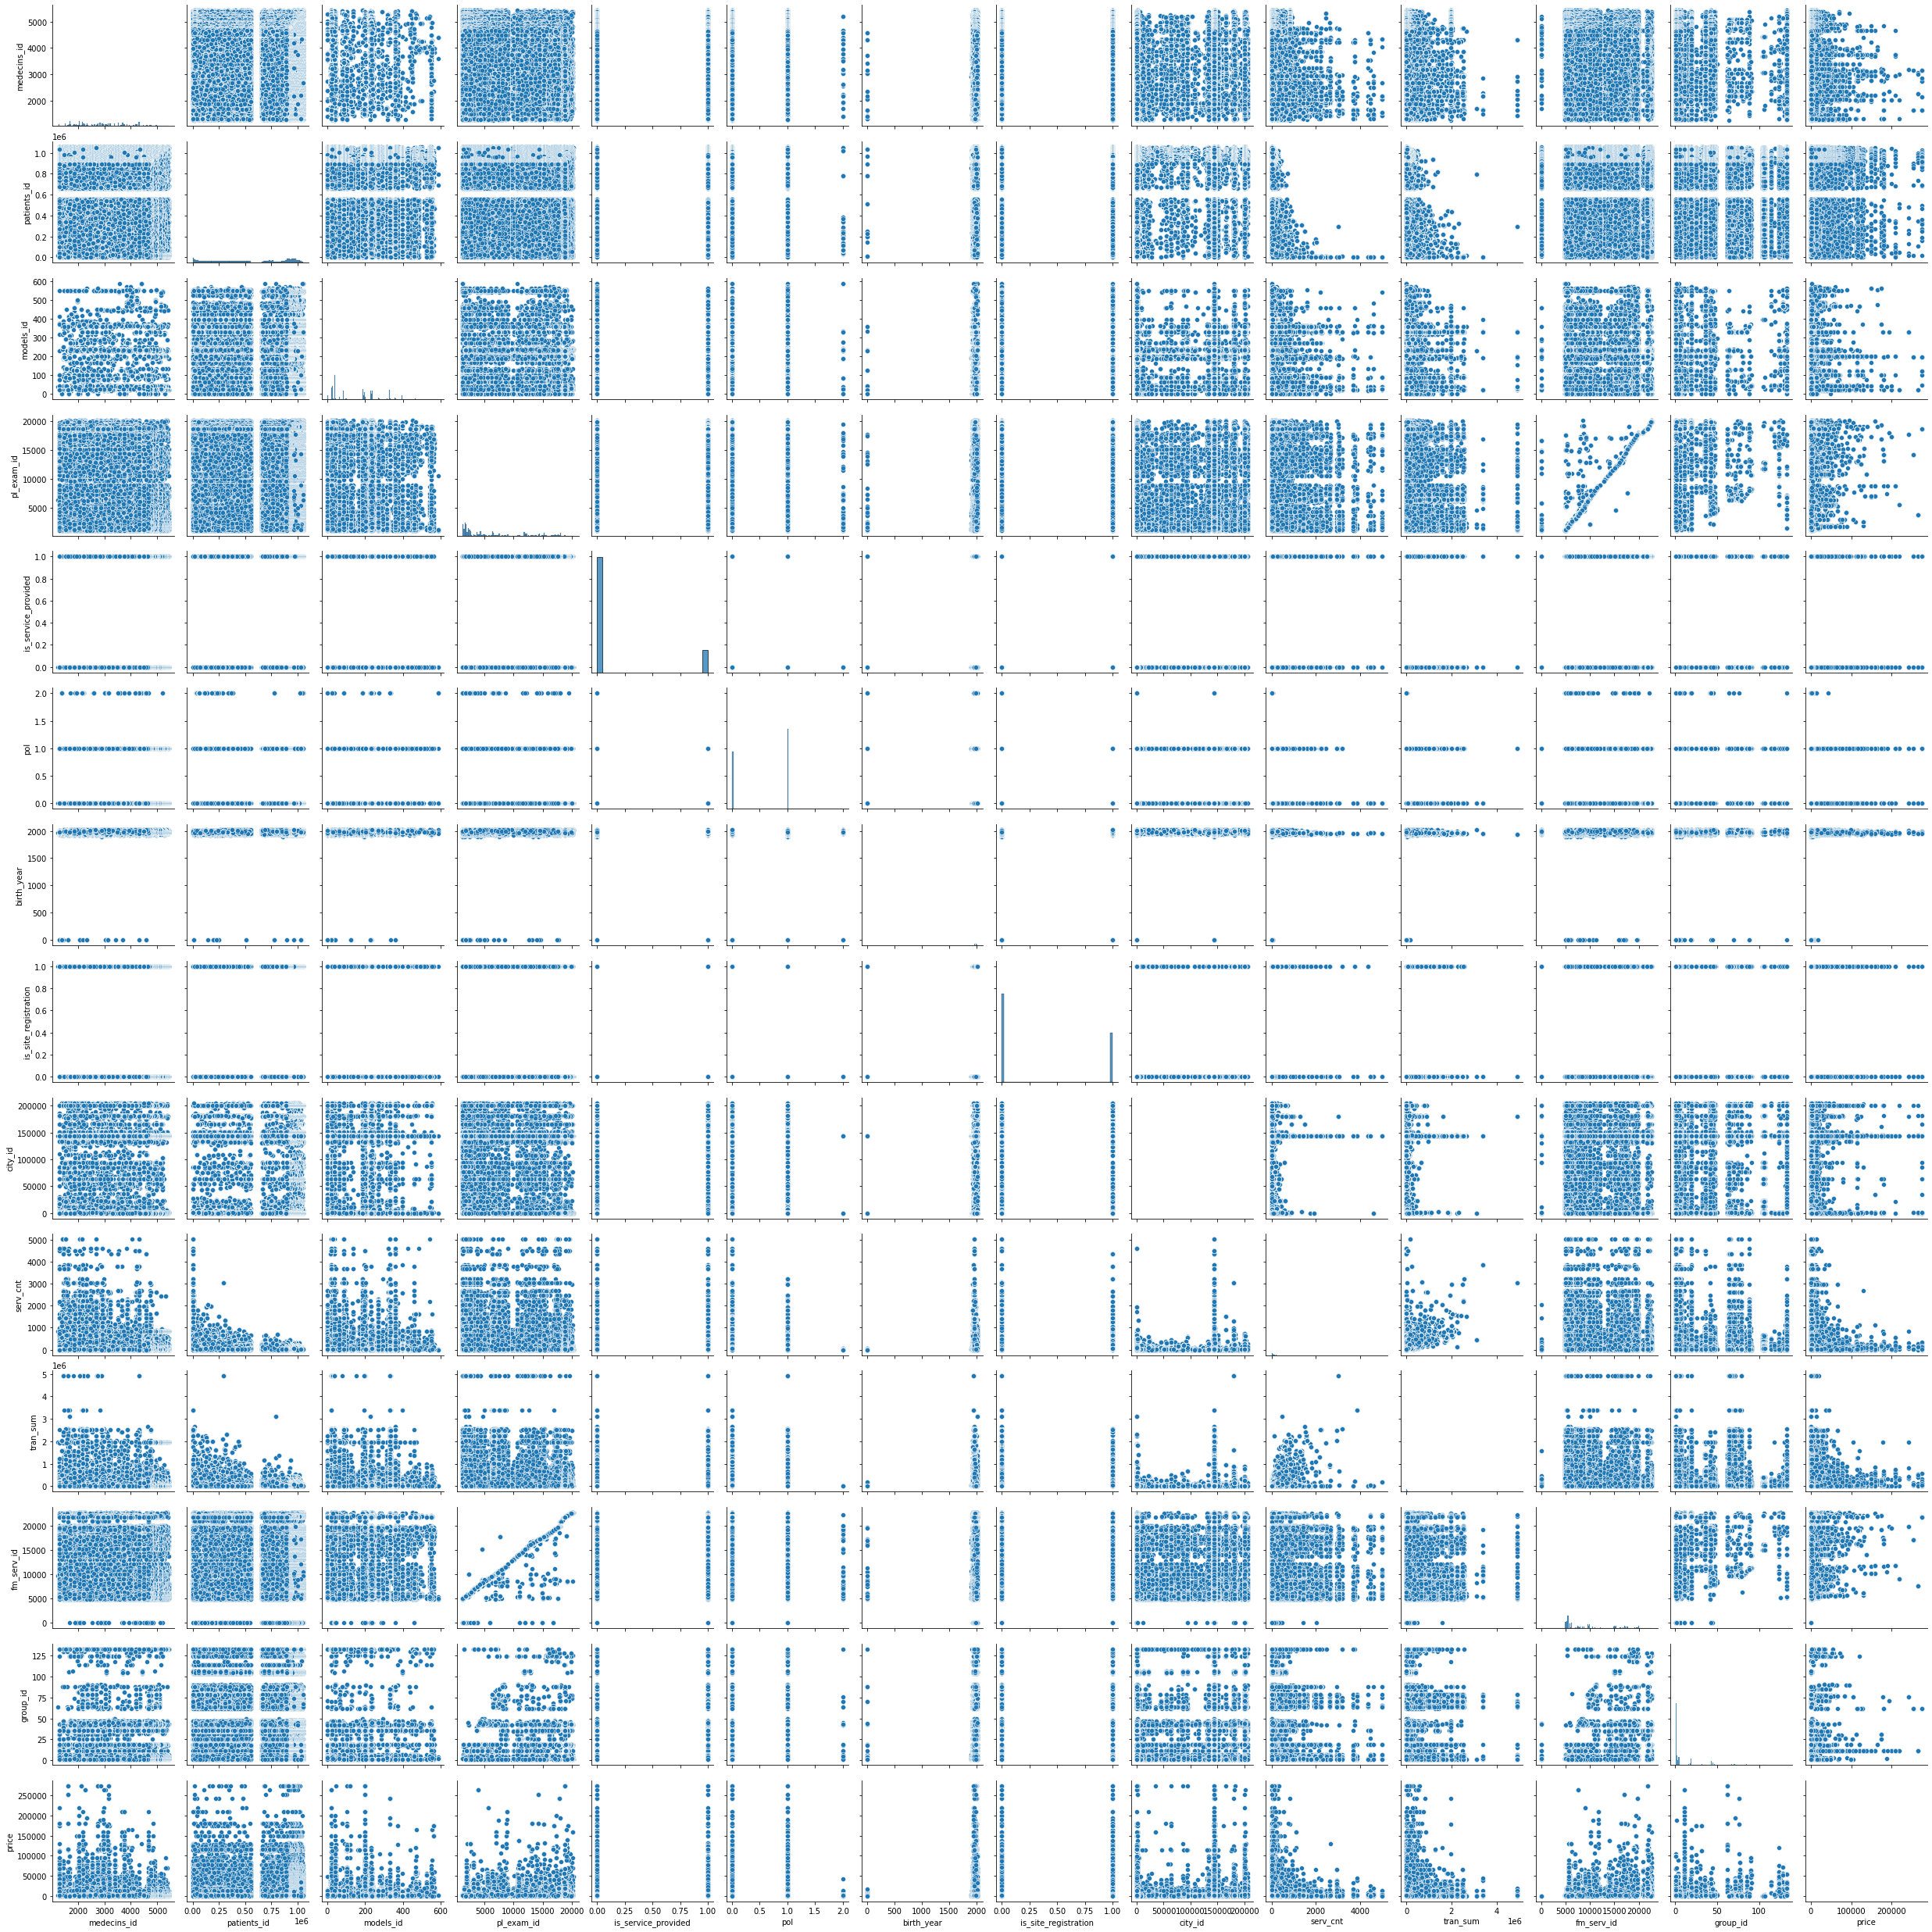

In [ ]:
sns.pairplot(big_table)